# ACCESS-NRI 2025 -- CMWG Workshop 

# Exporting ISSM Models

`pyISSM` allows ISSM models to be conveniently exported to regular gridded NetCDF using `pyissm.model.io.export_gridded_model()`. This function accepts an optional `variable_map` that defines variable names to be used for the exported fields. By default, this mapping uses the ISMIP6 variable naming convention.

Below we provide an example of exporting select model fields to a regular grid.

<div class="alert alert-block alert-info">
<b>AIM:</b> This notebook demonstrates the gridded export of an existing ISSM model.
</div>

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker


# Import pyISSM
import sys
sys.path.append('/g/data/nf33/access-nri/pyISSM/src/')
import pyissm

In [2]:
# Load an existing ISSM model onto md

md = pyissm.model.io.load_model('/g/data/nf33/access-nri/CMWG_workshop_2025/sample_models/antarctica_sample_model.nc')

ℹ️ Legacy classtype 'mesh2d.mesh2d' mapped to 'mesh.mesh2d'
ℹ️ Legacy classtype 'SMBforcing.SMBforcing' mapped to 'smb.default'
⚠️️ classtype does not exist for group basalforcings. Skipping...
ℹ️ Legacy classtype 'matice.matice' mapped to 'materials.ice'
ℹ️ Legacy classtype 'friction.friction' mapped to 'friction.default'
ℹ️ Legacy classtype 'timestepping.timestepping' mapped to 'timestepping.default'
ℹ️ Legacy classtype 'dsl.dsl' mapped to 'dsl.default'
ℹ️ Legacy classtype 'solidearth.solidearth' mapped to 'solidearth.earth'
⚠️ Unknown classtype verbose.verbose. Skipping...
⚠️ Unknown classtype toolkits.toolkits. Skipping...
⚠️ Unknown classtype gadi.gadi. Skipping...
ℹ️ Legacy classtype 'hydrologyshreve.hydrologyshreve' mapped to 'hydrology.shreve'
ℹ️ Legacy classtype 'calving.calving' mapped to 'calving.default'
ℹ️ Legacy classtype 'frontalforcings.frontalforcings' mapped to 'frontalforcings.default'
ℹ️ Legacy classtype 'love.love' mapped to 'love.default'
ℹ️ Legacy classtype 'm1qn

## 1. Define a grid for interpolation

The first required step is to define a regular grid onto which the ISSM model is interpolated. This can be defined in a number of different ways. Below, we provide an efficient approach to generate a 100 km x 100 km grid.

In [3]:
# Define the resolution of the grid
x_resolution = 100000
y_resolution = 100000

# Define a regular grid
grid_x = np.arange(md.mesh.x.min(), md.mesh.x.max(), x_resolution)
grid_y = np.arange(md.mesh.y.min(), md.mesh.y.max(), y_resolution)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

# Check the dimensions of the grid
print(f'Dimension of grid_x object: {grid_x.shape}')
print(f'Dimension of grid_y object: {grid_y.shape}')

# Calculate the grid size in km
print(f'Grid size in X direction (km): {(grid_x[0,-1] - grid_x[0, 0]) / 1000}')
print(f'Grid size in Y direction (km): {(grid_y[-1,0] - grid_y[0, 0]) / 1000}')

Dimension of grid_x object: (47, 55)
Dimension of grid_y object: (47, 55)
Grid size in X direction (km): 5400.0
Grid size in Y direction (km): 4600.0


## 2. Define a variable map of desired variables to export (optional)

Once a regular grid has been defined, select model fields can be interpolated onto the grid and saved to NetCDF file using the `pyissm.model.io.export_gridded_model()` function. By default, `pyISSM` exports common input and output fields, as well as some ISMIP6-calculated fields.

To export only specific fields, users can supply a custom `variable_map` either as a `*.csv` file, or a `pd.Dataframe()`. For example, to export only the ice surface elevation and ice base elevation, the `variable_map` can be constructed as follows:

In [4]:
# Define a variable map for exporting specific fields from the ISSM model
var_map = {
    'issmModelGroup': ['geometry', 'geometry'],
    'issmModelSubgroup': [np.nan, np.nan],
    'issmVariableName': ['surface', 'base'],
    'issmVariableUnit': ['m', 'm'],
    'outputVariableName': ['init_surface_altitude', 'init_base_altitude'],
    'outputVariableLongName': ['Initial ice surface altitude', 'Initial ice base altitude'],
    'outputVariableUnit': ['m', 'm']
}

# Convert the variable map to a pandas DataFrame
var_map = pd.DataFrame(var_map)

# View the variable map
var_map

,issmModelGroup,issmModelSubgroup,issmVariableName,issmVariableUnit,outputVariableName,outputVariableLongName,outputVariableUnit
0,geometry,NaN,surface,m,init_surface_altitude,Initial ice surface altitude,m
1,geometry,NaN,base,m,init_base_altitude,Initial ice base altitude,m


## 3. Export gridded model

Once the grid and [optional] variable map have been defined, the model can be exported simply using `pyissm.model.io.export_gridded_model()`. This generates a NetCDF file that can be used for additional analysis.

In [5]:
# Export the selected model fields onto the defined grid
pyissm.model.io.export_gridded_model(md,
                                     out_file = 'AIS_grid.nc',
                                     grid_x = grid_x,
                                     grid_y = grid_y,
                                     variable_map = var_map)

/g/data/nf33/access-nri/pyISSM/src/pyissm/model/io.py:387: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'TransientSolution' in var_map['issmModelSubgroup'].values and utils.has_nested_attr(md, 'results', 'TransientSolution'):


Gridding: surface
Gridding: base


---
# Visualising the gridded model

Once the model has been exported, it can be visualised and analysed with other common Python modules, such as `Xarray`. Below, we load the gridded model using `xarray`, examine it, and plot it along-side the original ISSM model.

In [6]:
# Load the gridded model
md_gridded = xr.open_dataset('AIS_grid.nc')

# Examine the gridded model
md_gridded


<xarray.Dataset> Size: 21kB
Dimensions:                (grid_x: 55, grid_y: 47)
Coordinates:
  * grid_x                 (grid_x) float32 220B -2.62e+06 ... 2.78e+06
  * grid_y                 (grid_y) float32 188B -2.243e+06 ... 2.357e+06
Data variables:
    init_surface_altitude  (grid_y, grid_x) float32 10kB ...
    init_base_altitude     (grid_y, grid_x) float32 10kB ...

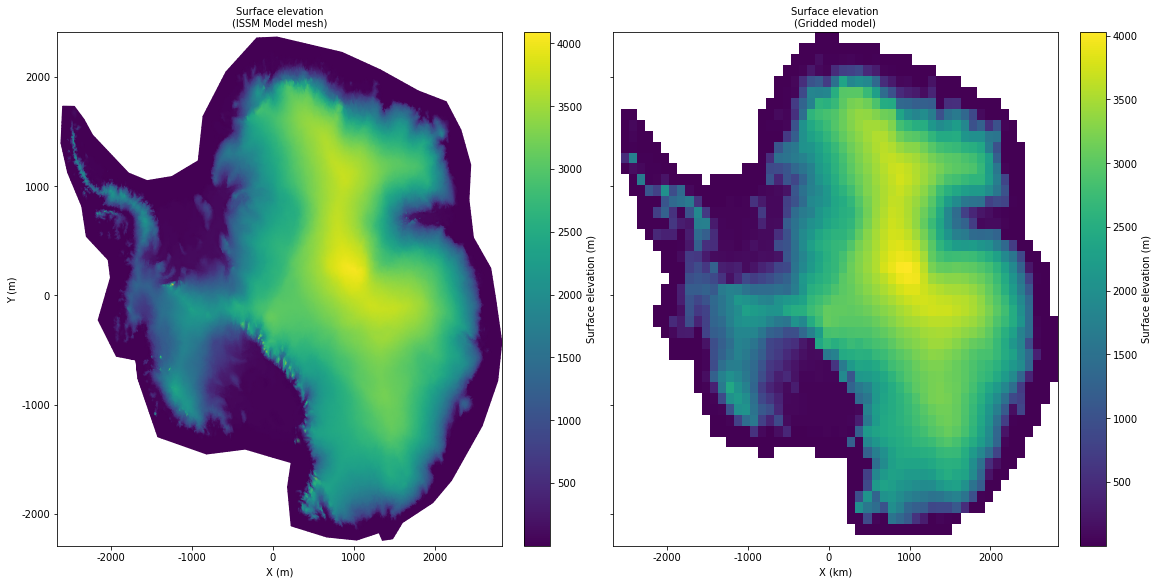

In [7]:
# Initialise a matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True, constrained_layout = True)

# Plot the ISSM model surface elevation
ax1 = pyissm.plot.plot_model_field(md,
                                   md.geometry.surface,
                                   ax = ax1,
                                   show_cbar = True,
                                   cbar_kwargs = {'label': 'Surface elevation (m)'})

# Plot the gridded model surface elevation
md_gridded.init_surface_altitude.plot(ax = ax2,
                                      cbar_kwargs = {'label': 'Surface elevation (m)'}) 

# Set titles for the subplots
ax1.set_title('Surface elevation\n(ISSM Model mesh)', fontsize = 10)
ax2.set_title('Surface elevation\n(Gridded model)', fontsize = 10)

# Adjust the X/Y ticks (only need to adjust ax1 as all subplots share X/Y axes)
formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f"{x/1000:.0f}")  # Convert m to km
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

# Adjust the axis labels on xarray plot
ax2.set_xlabel('X (km)')
ax2.set_ylabel('')

plt.show()

In [8]:
print(f'The maximum ice surface elevation in the native ISSM model is: {np.round(md.geometry.surface.max(), 2)} m')
print(f'The maximum ice surface elevation in the gridded model is: {np.round(float(md_gridded.init_surface_altitude.max()), 2)} m')

The maximum ice surface elevation in the native ISSM model is: 4087.6 m
The maximum ice surface elevation in the gridded model is: 4025.29 m
